# Projeto Final - CK0031

## Parte 1 - Otimização
### Aluno:
- <b>Marcos Felipe de Menezes Mota - 354080</b>

<p><b>Objetivo: Minimizar a função objetiva $f(x) = (4 - 2.1 x_{1}^2 + \dfrac{x_1^4}{3})x_1^2 + x_1x_2 - 4(1 - x_2^2)x_2^2$ </b></p>

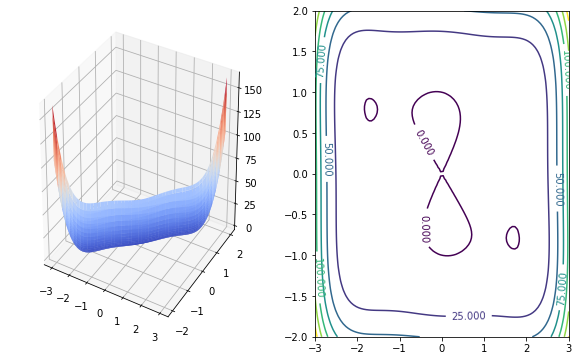

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


def f (x,y):
    part1 = ((4 -(2.1*(x**2))) + ((1/3.0)*(x**4)))*(x**2)
    part2 = (x*y) - (4*(1 - y**2))*(y**2)
    return part1 + part2


fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')

# p = ax.plot_wireframe(X, Y, Z)

X = np.linspace(-3, 3, 100)
Y = np.linspace(-2, 2, 100)
xv, yv = np.meshgrid(X, Y)
vf = np.vectorize(f)
Z = vf(x=xv, y=yv)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

ax = fig.add_subplot(1, 2, 2)
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)



plt.show()

Analisando o mapa de contorno podemos ver que os valores da função crescem vertigiosamente fora do intervalo $x_1 \in[-2,2]$ e $x_2 \in [-1.5, 1.5]$ assim facilitando limitando a escolha de um bom x0 ao escopo desse intervalo. Além disso a função tem 4 mínimos locais onde dois deles são maiores e por volta do ponto $[0, 0]$

<p><b>Cálculo do Gradiente e da Hessiana</b></p>
<p> Para a implementação e verificação dos métodos de otimização precisamos do vetor gradiente e da matrix Hessiana.<p>
<p> Inicialmente vamos simplificar a função objetiva.<p>
$$f(x) = 4x_1^2 - 2.1x_1^4 + \dfrac{x_1^6}{3} + x_1x_2 - 4x_2^2 + 4x_2^4$$
<p>Depois calculamos o gradiente e a Hessiana<p>
$$\nabla f = \begin{bmatrix}
    \dfrac{\partial f}{\partial x_1} \\
    \dfrac{\partial f}{\partial x_2} \\
\end{bmatrix} =
\begin{bmatrix}
    8x_1 - 8.4x_1^3 + 2x_1^5 + x_2 \\
    16x_2^3 + x_1 - 8x_2 \\
\end{bmatrix}$$<br>
Dado que em ambas as funções do gradiente depende apenas da outra variável apenas de forma aditiva simples. As derivadas parciais cruzadas são igual a 1. Tirando a derivada segunda do gradiente, temos:<br>
$$\nabla^2 f = \begin{bmatrix}
    10x_1^4 - 25.2x_1^2 + 8 & 1 \\
    1 & 48y^2 - 8 \\
\end{bmatrix}$$


### Implementando a otimização com direção gradiente 

In [2]:
import math
def f_grad(vec):
    x = vec[0]
    y = vec[1]
    def f_grad_x(x, y):
        return 8*x - 8.4*(x**3) + 2*(x**5) + y
    def f_grad_y(x, y):
        return 16*(y**3) + x - 8*y
    f_g = np.array([f_grad_x(x, y), f_grad_y(x, y)])
    return f_g


def optimize(fun, x0, fun_grad, step_size=0.01,max_steps=100, tolerance=0.001):
    
    xk = x0
    xk1 = math.inf
    res = [(x0, fun(x0[0], x0[1]))]
    for _ in range(max_steps):
        dx = -f_grad(xk)
        xk1 = xk + step_size*dx
        if (math.fabs(xk1[0] - xk[0]) or math.fabs(xk1[1] - xk[1])) < tolerance:
            break
        
        xk = xk1
        res += [(xk, fun(xk[0], xk[1]))]

    return res



In [3]:
def pretty_print(opt_array):
    
    print("|           x          |    f(x)   |")
    print("------------------------------------")
    for i in range(len(opt_array)):
        print("|{0:2f} , {1:3f}  | {2:4f} |".format(opt_array[i][0][0], opt_array[i][0][1], opt_array[i][1]))
        if i >= 9:
            print("|          .          |     .     |")
            print("|          .          |     .     |")
            print("|          .          |     .     |")
            print("|{0:2f} , {1:3f}  | {2:4f} |".format(opt_array[-1][0][0], opt_array[-1][0][1], opt_array[-1][1]))
            break
    print("# steps: ", len(opt_array) )


In [4]:
x0 = np.array([-0.75, -0.75])
opt_h = optimize(f, x0, f_grad)
pretty_print(opt_h)

|           x          |    f(x)   |
------------------------------------
|-0.750000 , -0.750000  | 1.222998 |
|-0.713191 , -0.735000  | 1.065796 |
|-0.675568 , -0.723138  | 0.910469 |
|-0.637376 , -0.713729  | 0.756029 |
|-0.598895 , -0.706281  | 0.602914 |
|-0.560423 , -0.700424  | 0.452363 |
|-0.522265 , -0.695874  | 0.305994 |
|-0.484714 , -0.692406  | 0.165504 |
|-0.448044 , -0.689838  | 0.032449 |
|-0.412496 , -0.688020  | -0.091904 |
|          .          |     .     |
|          .          |     .     |
|          .          |     .     |
|0.077192 , -0.711178  | -1.031004 |
# steps:  56


### Plot da linha de progressão do algoritmo no mapa de contorno

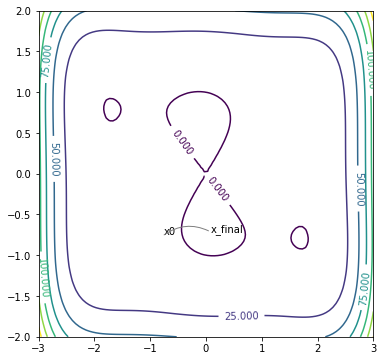

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)

ax.annotate("x0", xy=opt_h[0][0])
ax.annotate("",
            xy=opt_h[0][0], xycoords='data', xytext=(opt_h[-1][0]), textcoords='data',
                    arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )
ax.annotate("x_final", xy=opt_h[-1][0])
plt.show()


In [6]:
x0 = np.array([0.75, 0.75])
opt_h = optimize(f, x0, f_grad)
pretty_print(opt_h)

|           x          |    f(x)   |
------------------------------------
|0.750000 , 0.750000  | 1.222998 |
|0.713191 , 0.735000  | 1.065796 |
|0.675568 , 0.723138  | 0.910469 |
|0.637376 , 0.713729  | 0.756029 |
|0.598895 , 0.706281  | 0.602914 |
|0.560423 , 0.700424  | 0.452363 |
|0.522265 , 0.695874  | 0.305994 |
|0.484714 , 0.692406  | 0.165504 |
|0.448044 , 0.689838  | 0.032449 |
|0.412496 , 0.688020  | -0.091904 |
|          .          |     .     |
|          .          |     .     |
|          .          |     .     |
|-0.077192 , 0.711178  | -1.031004 |
# steps:  56


In [7]:
x0 = np.array([-1, -0.5])
opt_h = optimize(f, x0, f_grad)
pretty_print(opt_h)

|           x          |    f(x)   |
------------------------------------
|-1.000000 , -0.500000  | 1.983333 |
|-0.979000 , -0.510000  | 1.927660 |
|-0.956412 , -0.519786  | 1.865310 |
|-0.932184 , -0.529335  | 1.795564 |
|-0.906281 , -0.538629  | 1.717745 |
|-0.878692 , -0.547654  | 1.631273 |
|-0.849432 , -0.556399  | 1.535729 |
|-0.818552 , -0.564856  | 1.430927 |
|-0.786140 , -0.573023  | 1.316988 |
|-0.752324 , -0.580899  | 1.194400 |
|          .          |     .     |
|          .          |     .     |
|          .          |     .     |
|0.077702 , -0.711219  | -1.031053 |
# steps:  66


###  Os exemplos acima são exemplos onde a variação dos valores de x são adequadas e o método converge para um dos mínimos da função

In [8]:
x0 = np.array([-1, 1.5])
opt_h = optimize(f, x0, f_grad)
pretty_print(opt_h)

|           x          |    f(x)   |
------------------------------------
|-1.000000 , 1.500000  | 11.983333 |
|-0.999000 , 1.090000  | 2.036746 |
|-0.993828 , 0.979985  | 1.097152 |
|-0.987186 , 0.917738  | 0.774788 |
|-0.979449 , 0.877356  | 0.630689 |
|-0.970766 , 0.849283  | 0.554935 |
|-0.961201 , 0.828922  | 0.509226 |
|-0.950782 , 0.813718  | 0.477572 |
|-0.939514 , 0.802116  | 0.452450 |
|-0.927395 , 0.793109  | 0.429989 |
|          .          |     .     |
|          .          |     .     |
|          .          |     .     |
|-0.102274 , 0.714047  | -1.031029 |
# steps:  78


### Plot da linha de progressão do algoritmo no mapa de contorno

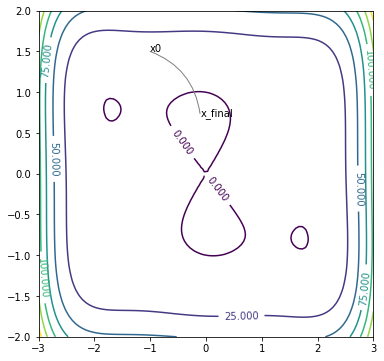

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)

ax.annotate("x0", xy=opt_h[0][0])
ax.annotate("",
            xy=opt_h[0][0], xycoords='data', xytext=(opt_h[-1][0]), textcoords='data',
                    arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )
ax.annotate("x_final", xy=opt_h[-1][0])
plt.show()


### No exemplos abaixo o algoritmo está convergindo muito devagar, logo fica abaixo da tolerância de variação de x

In [10]:
x0 = np.array([-1, 1.5])
opt_h = optimize(f, x0, f_grad, max_steps=100, tolerance=0.01)
pretty_print(opt_h)

|           x          |    f(x)   |
------------------------------------
|-1.000000 , 1.500000  | 11.983333 |
# steps:  1


In [11]:
x0 = np.array([0, 0])
opt_h = optimize(f, x0, f_grad,max_steps=100, tolerance=0.00001)
pretty_print(opt_h)

|           x          |    f(x)   |
------------------------------------
|0.000000 , 0.000000  | 0.000000 |
# steps:  1


No caso específico de x = [0, 0] não importa aumentar a tolerância pois é um saddle point

## Parte 2 - Probabilidade